# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd

# Loading the Dataset

In [ ]:
data = pd.read_csv("mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


# Exploring the Dataset

In [ ]:
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
print(data.shape)

(1453, 15)


# Selecting the relevant columns

In [ ]:
df = data.iloc[:, :11]

# Data Transformation

In [ ]:
df = (df == "Yes").astype(int)

# Calculating summary statistics

In [ ]:
col_means = df.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


# Performing PCA (Principial Component Anlaysis)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df)

# Summarizing PCA Results

In [ ]:
pca = PCA()
MD_pca=pca.fit_transform(df)
MD_p=pca.fit(df)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


# Printing PCA Results with Specified Precision

In [ ]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=df.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,-0.055,-0.308,0.171,0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,0.142,0.278,-0.348,0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,-0.198,0.071,-0.355,-0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,0.354,-0.073,-0.407,0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,-0.254,0.361,0.209,-0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,0.097,0.108,-0.595,0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,-0.119,-0.129,-0.103,0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,0.003,-0.211,-0.077,-0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,-0.068,-0.003,-0.261,0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,-0.763,0.288,-0.178,0.350,0.176,-0.186,-0.038,0.158


# Plotting PCA Results

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=2beab68e7af5f6247e20b300e23ca01f86e92a75615124c294f8e39cc234255b
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


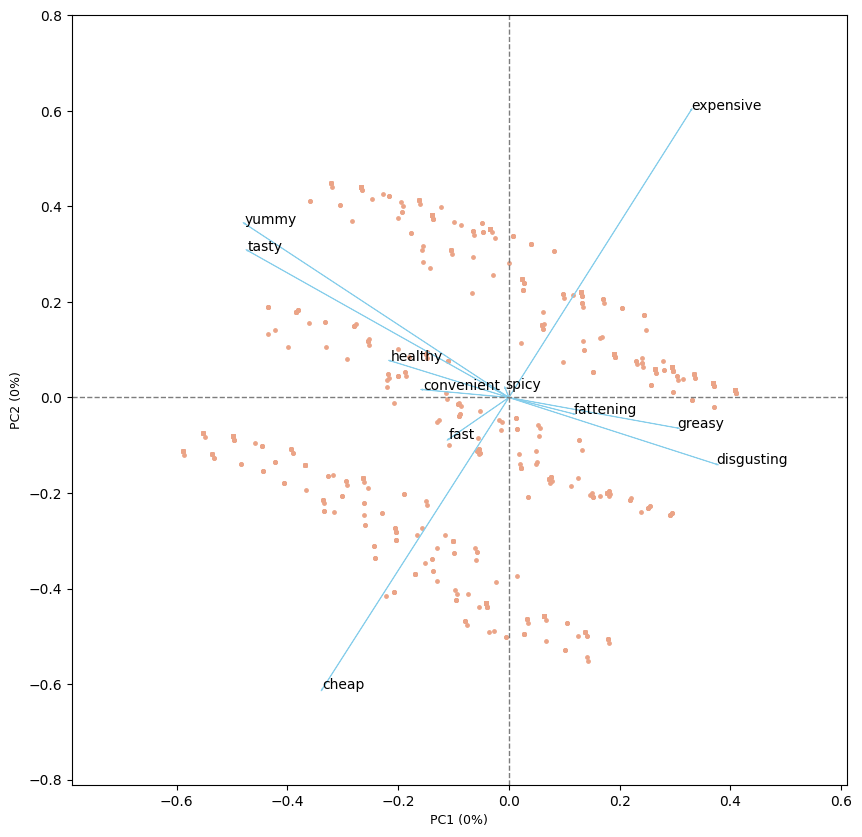

In [ ]:
!pip install bioinfokit
from bioinfokit.visuz import cluster
cluster.biplot(cscore=df_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

# Setting the seed

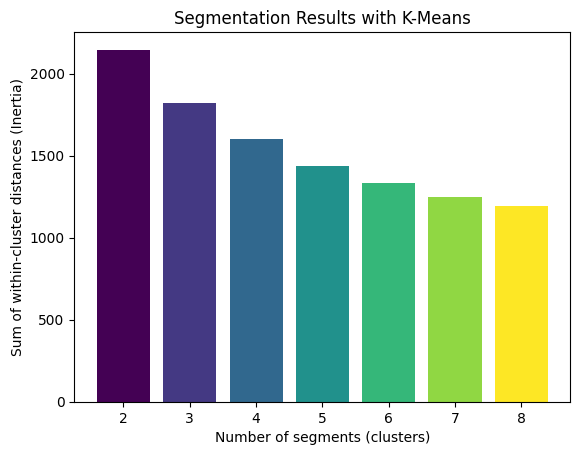

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(1234)

# Parameters
nrep = 10
num_segments = range(2, 9)  # Start from 2 (1 cluster is meaningless in KMeans)

# Store within-cluster distances (inertia) for each segment count
within_cluster_distances = []

# Fit KMeans for each number of clusters and store the inertia
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(df)  # Assuming MD_x is your input dataset (binary matrix)
    within_cluster_distances.append(kmeans.inertia_)

# Plot the sum of within-cluster distances with color
colors = plt.cm.viridis(np.linspace(0, 1, len(num_segments)))  # Color gradient

plt.bar(num_segments, within_cluster_distances, color=colors)
plt.xlabel("Number of segments (clusters)")
plt.ylabel("Sum of within-cluster distances (Inertia)")
plt.title("Segmentation Results with K-Means")
plt.xticks(num_segments)
plt.show()

# Clustering with K-Means

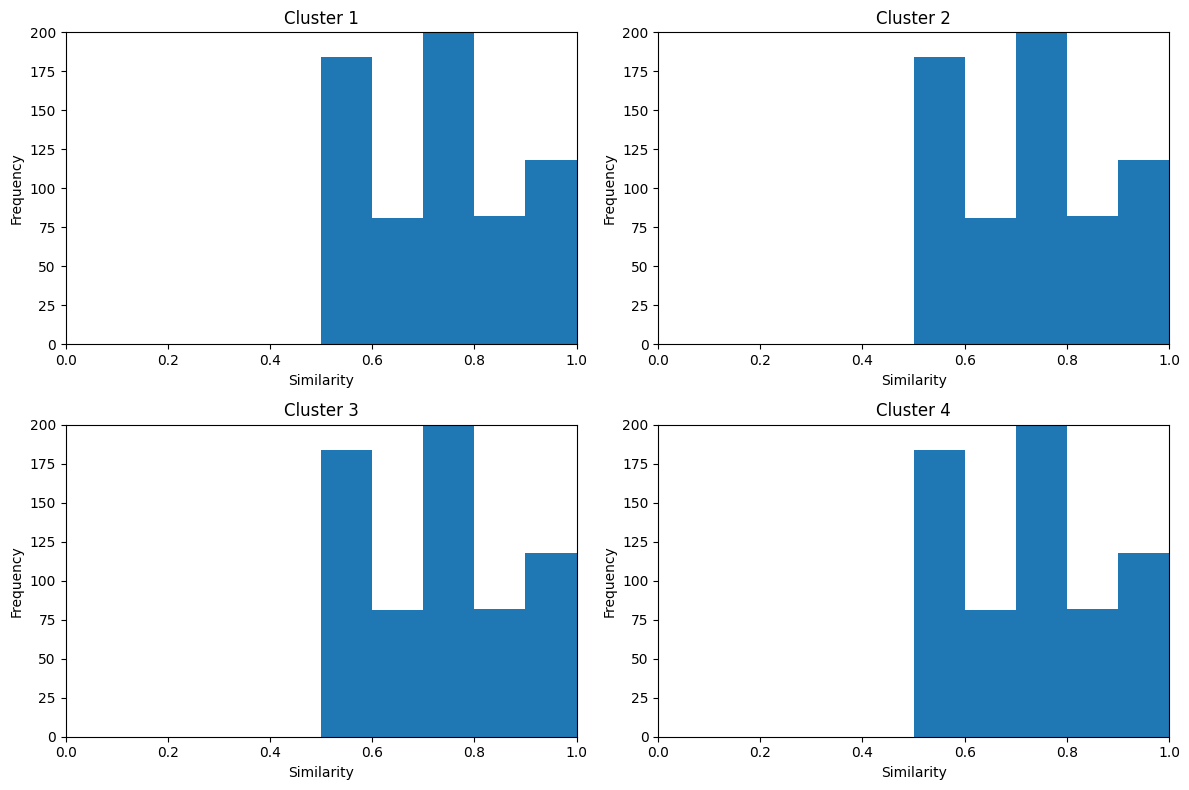

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df is the preprocessed binary dataset from your KMeans clustering.

# Fit KMeans model for 4 clusters
kmeans_4_clusters = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4_clusters.fit(df)

# Define the range of values and parameters for the Gorge plot
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create subplots (2x2 layout for 4 clusters)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each of the 4 clusters
for i in range(1, 5):
    labels = kmeans_4_clusters.labels_  # Cluster labels for the dataset
    similarities = kmeans_4_clusters.transform(df).min(axis=1)  # Minimum distance to the cluster centers

    # Determine row and column for subplots
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot histogram of similarities
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(i))

    # Set x and y axis limits and ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

# Segment Level Stability Across Solutions

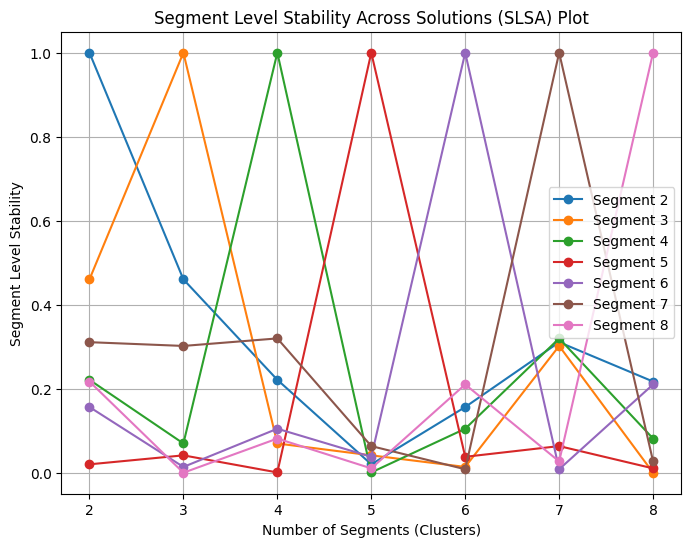

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df is your preprocessed binary dataset (Yes/No -> 1/0)

# Define the range for number of clusters (segments)
num_segments = range(2, 9)

# List to store segment stability values
segment_stability = []

# Fit KMeans models and predict labels for each number of segments
for segment in num_segments:
    kmeans = KMeans(n_clusters=segment, n_init=10, random_state=1234)
    labels_segment = kmeans.fit_predict(df)  # Predict labels for the current number of clusters
    segment_stability.append(labels_segment)

# Plot Segment Level Stability Across Solutions (SLSA)
plt.figure(figsize=(8, 6))

# Loop through each segment and calculate stability
for i, segment in enumerate(num_segments):
    # Calculate stability as the average match between the current segment and all other segments
    stability = [np.mean(segment_stability[i] == labels) for labels in segment_stability]

    # Plot the stability for the current segment
    plt.plot(num_segments, stability, marker='o', label=f'Segment {segment}')

# Set plot labels and title
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Segment level stability with solutions

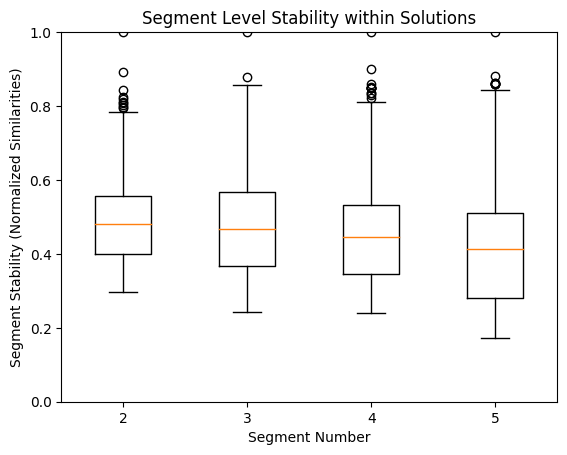

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of segment solutions (cluster numbers)
segment_solutions = [2, 3, 4, 5]

# Dictionaries to store labels and similarities for each segment solution
segment_labels = {}
segment_similarities = {}

# Fit KMeans models and get labels & similarities for each number of clusters
for segment in segment_solutions:
    kmeans = KMeans(n_clusters=segment, n_init=10, random_state=1234)

    # Predict cluster labels for the current segment solution
    segment_labels[segment] = kmeans.fit_predict(df)

    # Calculate the minimum distance to cluster centers for each point (similarity)
    segment_similarities[segment] = kmeans.transform(df).min(axis=1)

# List to store normalized stability values for each segment
segment_stability_values = []

# Calculate and normalize the stability values for each segment solution
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    # Normalize similarities by dividing by the max similarity value
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Create a boxplot to visualize segment level stability within solutions
plt.boxplot(segment_stability_values, whis=1.5)

# Set plot labels, title, and limits
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability (Normalized Similarities)")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

# Show the plot
plt.show()

# Using mixture of Distributions

In [ ]:
from scipy.stats import entropy
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

# Set random seed for reproducibility
np.random.seed(1234)

# Define the range for number of clusters (k values)
k_values = range(2, 9)

# List to store metrics (iter, AIC, BIC, ICL, etc.) for each model
metrics_list = []

# Loop through different k values and fit KMeans models
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(df)  # Fit KMeans on the binary dataset 'df'

    # Extract the number of iterations until convergence
    iter_val = model.n_iter_

    # Convergence status
    converged = True  # Assuming KMeans always converges in this case

    # Calculate log-likelihood (negative inertia as a proxy)
    log_likelihood = -model.inertia_  # Inertia is the sum of squared distances

    # Get the number of samples and features from the data
    n_samples, _ = df.shape

    # Calculate AIC and BIC
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Calculate the entropy for cluster distribution (ICL adjustment)
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())  # Convert counts to probabilities
    class_entropy = entropy(probs)  # Entropy of the cluster distribution

    # Calculate ICL (BIC adjusted for class entropy)
    icl = bic - class_entropy

    # Append the results to the list
    metrics_list.append((iter_val, converged, k, k, log_likelihood, aic, bic, icl))

# Convert the results to a DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics_list, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the metrics DataFrame
print(metrics_df)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


# Information Criteria

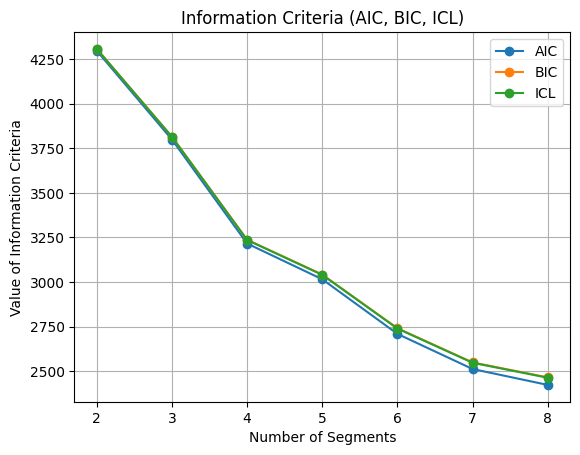

In [ ]:
# Assuming that 'metrics_df' from the earlier code is equivalent to 'MD_m28'
# Extract the necessary columns from 'metrics_df'
num_segments = metrics_df["k"]       # Number of segments (clusters)
AIC_values = metrics_df["AIC"]       # AIC values
BIC_values = metrics_df["BIC"]       # BIC values
ICL_values = metrics_df["ICL"]       # ICL values

# Plotting AIC, BIC, and ICL values against the number of segments
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

# Setting labels and title for the plot
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')

# Adding legend and grid for better visualization
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Predicting Clusters using k-means

In [ ]:
# Import necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd

# Define number of clusters (k) for KMeans and Gaussian Mixture
k = 4

# Fit KMeans model for 'k' clusters
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(df)  # Assuming 'df' is your binary matrix dataset (preprocessed)

# Predict clusters using KMeans
kmeans_clusters = kmeans.predict(df)

# Fit Gaussian Mixture model for 'k' components
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(df)  # Assuming 'df' is the same dataset for comparison

# Predict clusters using Gaussian Mixture
gmm_clusters = gmm.predict(df)

# Create a DataFrame to store both KMeans and GMM cluster results
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Select data points that belong to the 3rd cluster in GMM results
df_m4 = df[results['mixture'] == 3]

# Fit KMeans again on the subset of data (3rd cluster of GMM)
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(df_m4)

# Predict clusters within the GMM's 3rd cluster
k4_m4_clusters = k4_m4.predict(df_m4)

# Create a DataFrame for the refined clustering results within the GMM's 3rd cluster
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Crosstab to compare original KMeans clusters with GMM clusters
print(pd.crosstab(results['kmeans'], results['mixture']))

# Crosstab to compare KMeans clusters within GMM's 3rd cluster
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


# Likelihood

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(df)

log_likelihood_m4a = gmm_m4a.score(df)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(df)

log_likelihood_m4 = gmm_m4.score(df)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807


# Reversed Counts

In [ ]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


<ipython-input-27-d525372f2881>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(data['Like'])


# Mapping of string values

In [ ]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [ ]:
from patsy import dmatrices

independent_vars = data.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


# Cluster Size

In [ ]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


# Segment Profiles

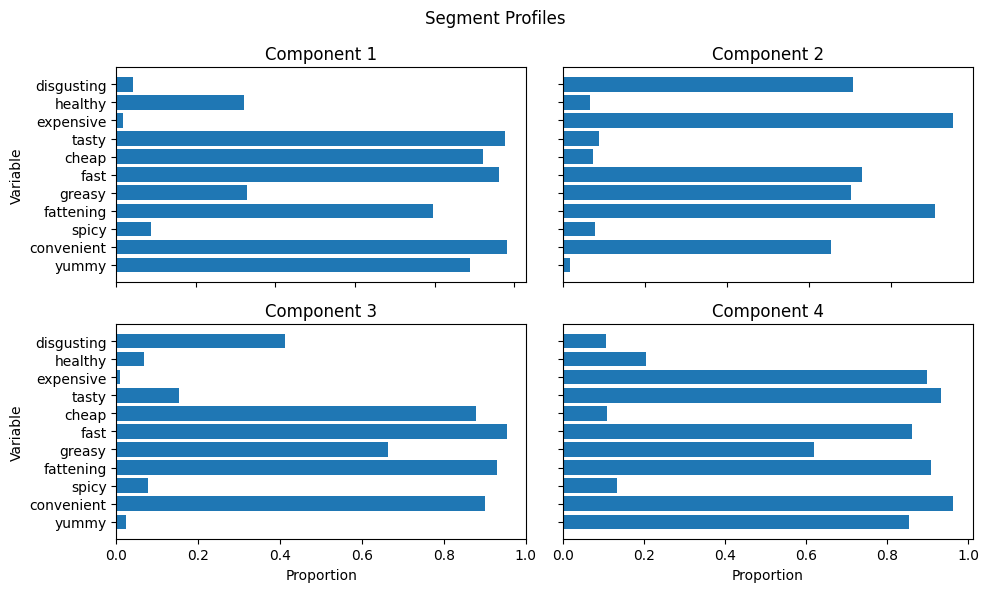

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'MD' is your dataset and 'MD_m4' is the subset from earlier steps
# Step 1: Apply KMeans to the MD_m4 data (or another subset if you prefer)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(df)

# Step 2: Get the cluster labels
labels = kmeans.labels_

# Step 3: Compute the mean of each variable grouped by the cluster labels
MD_mean = df.groupby(labels).mean()

# Step 4: Plot the cluster profiles for each component
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')

axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')

axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')

axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Set labels for the axes
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(df.columns)

# Remove axis labels for cleaner visualization
for ax in axs.flat:
    ax.label_outer()

# Set a global title for the figure
fig.suptitle('Segment Profiles')

# Adjust the layout to avoid overlap
fig.tight_layout()

# Step 5: Display the plot
plt.show()


# Principal Component

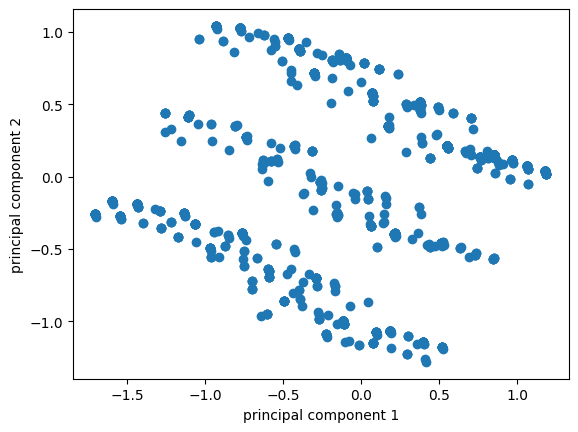

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(df)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

# Crosstab

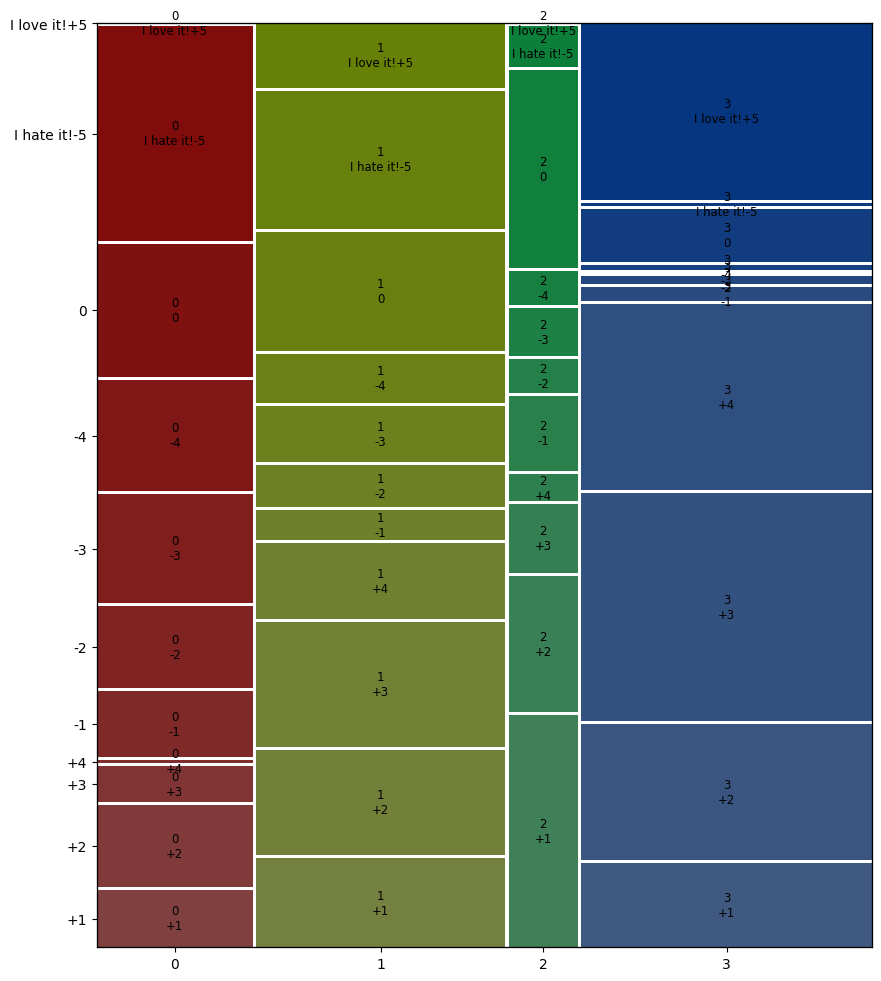

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data
df_eleven = data.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(data['cluster_num'],data['Like'])
#Reordering cols
data
# Use actual column names from crosstab
crosstab = crosstab[crosstab.columns]
crosstab
plt.rcParams['figure.figsize'] = (10,12)
mosaic(crosstab.stack())
plt.show()

# Gender Tab

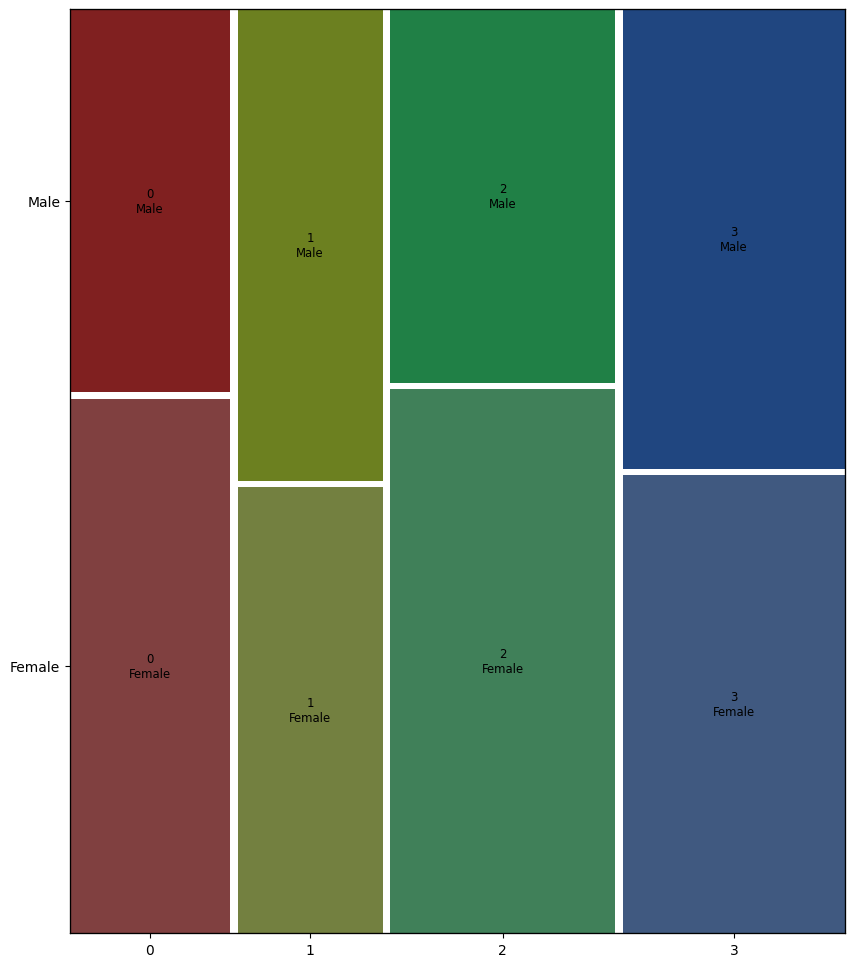

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4= KMeans(n_clusters=4)
MD_k4.fit(df)
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

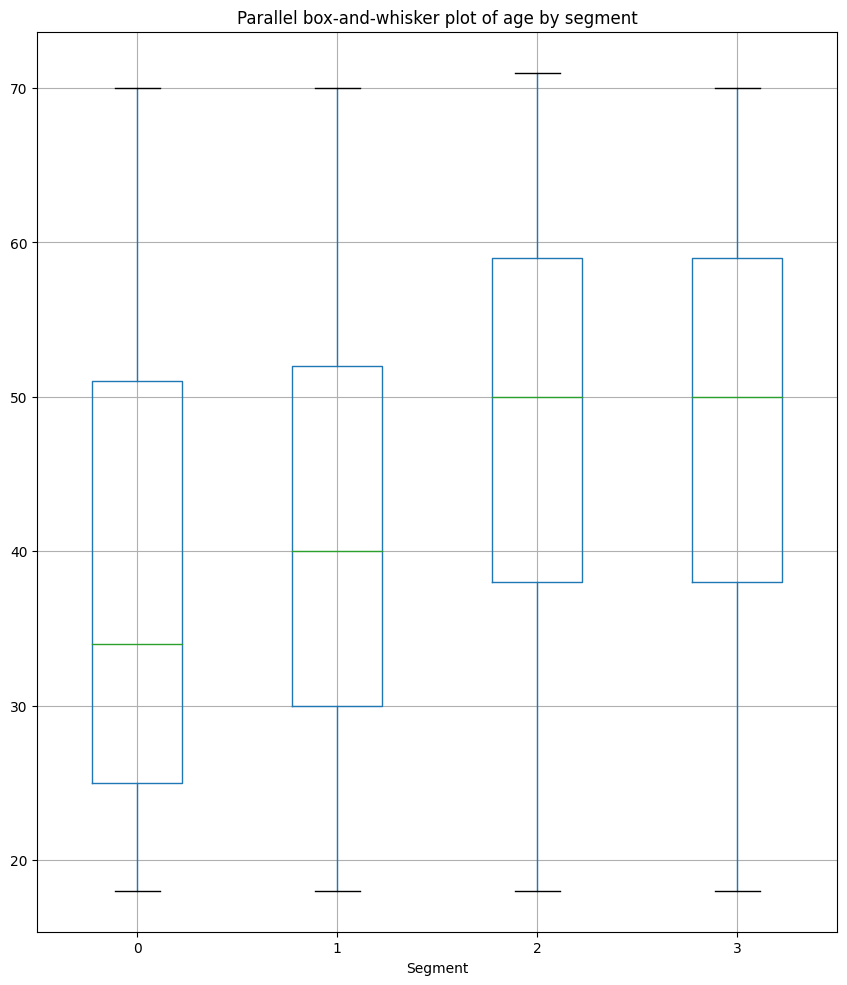

In [ ]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [ ]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [ ]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [ ]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


# Simple Segment evaluation plot

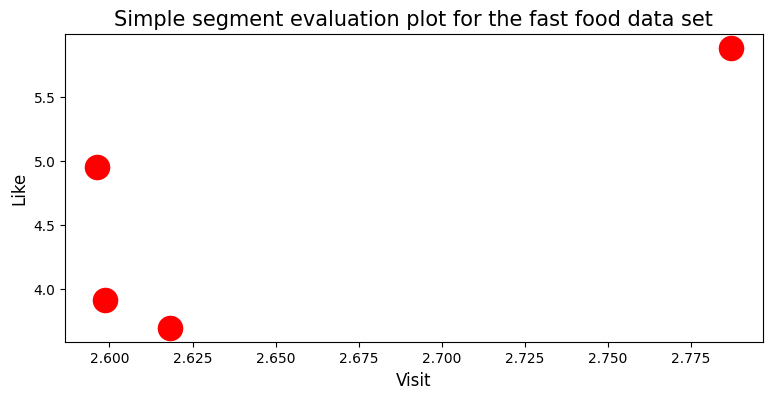

In [ ]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()